<div>
    <h1><center style="background-color:#C39BD3; color:white;"> 🚀 Spaceship Titanic 🚀</center></h1>
</div>

<div>
<center><img src="https://i.pinimg.com/originals/f0/f3/c2/f0f3c2e06ceaf6bfaf439f27a0a4de83.gif" width = '500px'
 height = '400px'></center>
</div>

<div>
<img src=https://i.pinimg.com/originals/72/2e/d4/722ed4271802efddb517f0d9234ca375.gi>
</div>

# Importing Libraries

<div>
    <h3><center style="background-color: #7b7d7d; color:white;">
    <strong>Importing Librariees 📚</strong></center></h3>
</div>

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt


from plotly.subplots import make_subplots
from collections import Counter
from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
bl_ = Fore.BLACK

In [2]:
plt.rcParams['figure.figsize'] = (15,8)

In [3]:
custom_color = ["#17202a",'#e03232', '#b60337', '#fa3f75', '#fa0c40', '#f4d03f']
customPalette = sns.set_palette(sns.color_palette(custom_color))

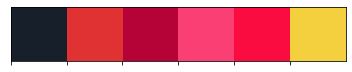

In [4]:
sns.palplot(sns.color_palette(custom_color), size=1)

In [5]:
YELLOW = sns.dark_palette(custom_color[4], reverse=False)
PINK = sns.dark_palette(custom_color[3])
# plt.show()
# sns.color_palette(sns.dark_palette(custom_color[1], reverse=False))

In [6]:
sns.color_palette(PINK)

[(0.18477345381581842, 0.13516407039450562, 0.1432407751637511),
 (0.3438971944252037, 0.15754302102148685, 0.20635732601335383),
 (0.5030209350345891, 0.17992197164846807, 0.26947387686295654),
 (0.6621446756439744, 0.20230092227544932, 0.33259042771255926),
 (0.8212684162533598, 0.22467987290243055, 0.39570697856216197),
 (0.9803921568627451, 0.24705882352941178, 0.4588235294117647)]

In [7]:
train_df = pd.read_csv('train.csv')

# Loading dataset

<div>
    <h3><center style="background-color:#7b7d7d; color:white;"> <strong>Loading Dataset and Displaying rows</strong></center></h3>
</div>

In [8]:
train_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


<h5> So now we have imported the dataset, now let's check the datatype of each column

May be there is any mixture of different datatypes in single columns 

So lets check that first <h5>

# Exploratory Data Analysis

In [9]:
train_df.shape

(8693, 14)

## Checking dtypes

In [10]:
print(f"{y_} Data types of data columns: \n{m_}{train_df.dtypes}")

print(f'{r_}\nOccurance of Dtypes')
[print(f"{g_}{values} Features/columns have dtype {keys}") for keys, values in Counter(train_df.dtypes).items()]

 Data types of data columns: 
PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

Occurance of Dtypes
7 Features/columns have dtype object
6 Features/columns have dtype float64
1 Features/columns have dtype bool


[None, None, None]

In [11]:
train_df.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True


But VIP should be Bool. so let's check that, whether any other values except True and False are present in VIP or not

In [12]:
train_df.VIP.value_counts()

False    8291
True      199
Name: VIP, dtype: int64

So the dataset is clear from any mixing dtype, we can change dtype of VIP to bool

In [13]:
train_df['VIP'] = train_df[['VIP']].astype(bool)

## Check for Null values

<div>
    <h4><center style="background-color:#e03232; color:black">
     So we have many null values</center>
    </h4>
</div>

In [14]:
Na_df = pd.DataFrame(train_df.isnull().sum().sort_values(), columns= ['counts'] )
Na_df['percentage'] = (Na_df['counts']/8693)*100
Na_df

,counts,percentage
PassengerId,0,0.000000
VIP,0,0.000000
Transported,0,0.000000
Age,179,2.059128
RoomService,181,2.082135
Destination,182,2.093639
FoodCourt,183,2.105142
Spa,183,2.105142
VRDeck,188,2.162660
Cabin,199,2.289198


In [15]:
fig = px.imshow(train_df.isnull(), height = 480)
# fig.update_layout(title_text = 'Null values', title_x = 0.5)
fig.show()


<p>
From Null value table and heat map, we conclude that there are null values and highest percentage of its occurance is 2.5%, so we can drop null values but as we can see from heatmap the null values are in different rows that is if we drop all null values data will reduced far greater that 2.5% or may be upto 10%</p>


So lets try dropping method first



### Dropping Null values

In [16]:
train_df_drop_na = train_df.dropna(axis = 0).reset_index(drop = True)
print(f"{m_}Shape of DataFrame after removing Null values is {train_df_drop_na.shape}")
print(f"{g_}Hence the Data is reduced by {(train_df.shape[0]-train_df_drop_na.shape[0])*100/8693}")

Shape of DataFrame after removing Null values is (6771, 14)
Hence the Data is reduced by 22.109743471758886


🙄🙄😲 What !! The dataset is reduced by 22% 

So we have to replace Null values

## Replace Null values

In [17]:
# First lets take a look on rows having null values
df_null = train_df[train_df.isnull().any(axis = 1)]
df_null.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False
16,0014_01,Mars,False,F/3/P,55 Cancri e,27.0,False,1286.0,122.0,NaN,0.0,0.0,Flats Eccle,False
23,0020_03,Earth,True,E/0/S,55 Cancri e,29.0,False,0.0,0.0,NaN,0.0,0.0,Mollen Mcfaddennon,False
25,0020_05,Earth,True,E/0/S,PSO J318.5-22,1.0,False,NaN,0.0,0.0,0.0,0.0,Mael Brantuarez,False
27,0022_01,Mars,False,D/0/P,TRAPPIST-1e,21.0,False,980.0,2.0,69.0,0.0,0.0,NaN,False
28,0024_01,Europa,True,C/2/S,TRAPPIST-1e,62.0,False,0.0,0.0,NaN,0.0,0.0,Penton Fullided,True
35,0031_03,Mars,False,F/9/P,TRAPPIST-1e,20.0,False,NaN,0.0,1750.0,990.0,0.0,Dontch Datie,True
40,0039_01,Earth,True,G/1/P,55 Cancri e,30.0,False,0.0,0.0,NaN,0.0,0.0,Jorgie Batthewitt,False


<h4>Some Observations from above dataset</h4>

1. We have to drop 2.3% of data (rows), because it is associated with names and there is no way to fill those, but After all name is just a representation of human being, we can fill any thing there or just drop name columns if it is not necessary (I am going to drop that column).

2. If you look carefully when a given person is in Cryo-chamber, then he/she can't eat or can't do any things, so the services cost is going to be zero, because he/she is already in heaven 😴😴.

3. Point 2 can be used to fill null values in Cryo-chamber columns, that is if all prices are zero hence that person is in cryo-chamber and visa-versa. Only problem will be there, where the person is not in sleep and having some price colunms equal to null 🙄🤔❓.

In [18]:
train_df_1 = train_df.copy()

#### Filling Na values in CryoSleep

I am applying following steps:
1. Check how many null values are there in CryoSleep having all costs equal to zero, Those will be replaced by True
2. Check how many null values are there in CryoSleep having all costs not equal to zero, those will be replaced by False

In [19]:
a = train_df_1.CryoSleep[(train_df_1.RoomService == 0) & (train_df_1.FoodCourt == 0) & 
    (train_df_1.ShoppingMall==0) & (train_df_1.Spa==0) & (train_df_1.VRDeck == 0)].isna().sum()
print(f"{y_} There are total {bl_}{a}{y_} Null values in CryoSleep having all costs equal to zero")

 There are total 87 Null values in CryoSleep having all costs equal to zero


In [20]:
a = train_df_1.CryoSleep[~((train_df_1.RoomService == 0) & (train_df_1.FoodCourt == 0) & 
    (train_df_1.ShoppingMall==0) & (train_df_1.Spa==0) & (train_df_1.VRDeck == 0))].isna().sum()

print(f"{y_} There are total {bl_}{a}{y_} Null values in CryoSleep having all costs not equal to zero")

 There are total 130 Null values in CryoSleep having all costs not equal to zero


In [21]:
condition = (train_df_1.RoomService == 0) & (train_df_1.FoodCourt == 0) & (train_df_1.ShoppingMall==0) & (train_df_1.Spa==0) & (train_df_1.VRDeck == 0)
train_df_1[condition]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True
18,0016_01,Mars,True,F/5/P,TRAPPIST-1e,45.0,False,0.0,0.0,0.0,0.0,0.0,Alus Upead,True
19,0017_01,Earth,False,G/0/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Lyde Brighttt,True
21,0020_01,Earth,True,E/0/S,TRAPPIST-1e,1.0,False,0.0,0.0,0.0,0.0,0.0,Almary Brantuarez,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8680,9268_01,Earth,True,G/1505/P,TRAPPIST-1e,31.0,False,0.0,0.0,0.0,0.0,0.0,Agnesa Baldson,True
8681,9270_01,Earth,True,G/1497/S,55 Cancri e,33.0,False,0.0,0.0,0.0,0.0,0.0,Lan Mckinsond,True
8684,9274_01,NaN,True,G/1508/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,True
8685,9275_01,Europa,False,A/97/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Polaton Conable,True


In [22]:
condition = (train_df_1.RoomService == 0) & (train_df_1.FoodCourt == 0) & (train_df_1.ShoppingMall==0) & (train_df_1.Spa==0) & (train_df_1.VRDeck == 0)
train_df_1.loc[condition, 'CryoSleep'] = True

In [23]:
condition = ~((train_df_1.RoomService == 0) & (train_df_1.FoodCourt == 0) & 
    (train_df_1.ShoppingMall==0) & (train_df_1.Spa==0) & (train_df_1.VRDeck == 0))
train_df_1.loc[condition, 'CryoSleep'] = False

In [24]:

train_df_1.CryoSleep[~((train_df_1.RoomService == 0) & (train_df_1.FoodCourt == 0) & 
    (train_df_1.ShoppingMall==0) & (train_df_1.Spa==0) & (train_df_1.VRDeck == 0))] = False

C:\Users\HP\AppData\Local\Temp/ipykernel_1672/1133740574.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
a = train_df_1.CryoSleep[(train_df_1.RoomService == 0) & (train_df_1.FoodCourt == 0) & 
    (train_df_1.ShoppingMall==0) & (train_df_1.Spa==0) & (train_df_1.VRDeck == 0)].isnull().sum()

print(f"{y_} There are total {bl_}{a}{y_} Null values in CryoSleep having all costs equal to zero")

 There are total 0 Null values in CryoSleep having all costs equal to zero


In [26]:
train_df_1.CryoSleep[~((train_df_1.RoomService == 0) & (train_df_1.FoodCourt == 0) & 
    (train_df_1.ShoppingMall==0) & (train_df_1.Spa==0) & (train_df_1.VRDeck == 0))].isna().sum()

print(f"{y_} There are total {bl_}{a}{y_} Null values in CryoSleep having all costs not equal to zero")

 There are total 0 Null values in CryoSleep having all costs not equal to zero


So now those Na values are filled

In [27]:
train_df_1.CryoSleep.isnull().sum()

0

#### Filling Null values of RoomService

As we can fill RoomService null values by taking help from CryoSleep column and Other rate/services Columns
like:
1. if all other services columns are equal to zero and CryoSleep is False, hence that person is awake and so there will be RoomService cost which, i am going to fill with mediam
2. if all other services columns are equal to zero and CryoSleep is True, then RoomService is also Zero

In [28]:
train_df_1[train_df_1.CryoSleep == False].isnull().sum()

PassengerId       0
HomePlanet      124
CryoSleep         0
Cabin           110
Destination     128
Age             100
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            128
Transported       0
dtype: int64

In [29]:
train_df_drop_na = train_df_1.dropna(axis = 0)

#### Distribution of values

In [30]:
def Plots(df, x, y=None, title = None):
    fig = make_subplots(rows= 3, cols= 1,
 
    row_heights= [0.25,0.25,0.5])
    fig.append_trace(go.Box(x=df[x],  ), row=1, col = 1)
    fig.append_trace(go.Violin(x = df[x]), row=2, col=1)
    fig.append_trace(go.Histogram(x = df[x]), row = 3, col= 1)
    

    fig.update_xaxes(title_text= 'Box plot', row = 1, col = 1)
    fig.update_xaxes(title_text= 'Voilin plot', row = 2, col=1)
    fig.update_xaxes(title_text = 'Histogram', row=3, col=1)
    fig.update_layout(title_text = title , height = 1200, width = 1000, showlegend = False)
    fig.show()

In [31]:
Plots(train_df, x='RoomService', title = 'Room Service rates')

In [32]:
fig = px.box(train_df_drop_na, 'RoomService', color= 'CryoSleep', points='all')
fig.update_traces(jitter = 0.1 )
fig.show()

Conclusion:
1. As expected, if CryoSleep is true the room service is Zero
2. If CryoSleep is False the room sevice is 13 (median)

so we are filling None values with 13 if CryoSleep is False

In [33]:
train_df_1.RoomService.isnull().sum()

181

In [34]:
train_df_1.loc[(train_df_1.CryoSleep == False) & (train_df_1.RoomService.isnull() == True), 'RoomService'] = 13

In [35]:
train

NameError: name 'train' is not defined

In [ ]:
def dist_plot(df,x):
    fig = px.line(data_frame=df, x = x)
    fig.show()

In [36]:
px.violin(train_df, 'RoomService', template='ggplot2', title= 'Room Service')

In [37]:
px.box(train_df_notna, 'RoomService', color= 'CryoSleep' )

NameError: name 'train_df_notna' is not defined

#### Drop Name column

In [ ]:
train_df_1.drop('Name', axis = 1, inplace= True)

In [ ]:
train_df_1.head(5)